In [1]:
import numpy as np
import pandas as pd
#import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, plot_model
from keras.datasets import fashion_mnist
from keras.optimizers import RMSprop, SGD, Adam, Nadam

import matplotlib.pyplot as plt

In [2]:
(train_imagesi,train_labels), (test_imagesi,test_labels) = fashion_mnist.load_data()

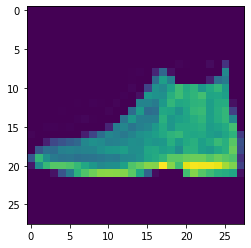

In [3]:
plt.imshow(test_imagesi[0,:,:])
plt.show()

In [4]:
# Normalize the images.
train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [5]:
train_images.shape

(60000, 784)

In [6]:
# Build the model.
model = Sequential([
  Dense(64, activation='tanh', input_shape=(784,)),
#   Dense(64, activation='tanh'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [7]:
model1 = Sequential(name = 'my_model')
model1.add(Dense( 128, activation = 'relu', input_shape=(784,)))
for k in range(1):
    model1.add(Dense((10-k)*10, activation='relu', input_shape=(784,)))


model1.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


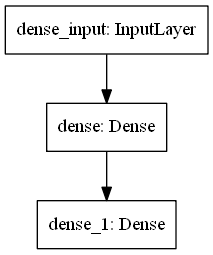

In [9]:
plot_model(model, to_file='model.png')

In [10]:
# model.get_config()

In [11]:
y_tr = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

In [12]:
y_tr[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [14]:
# Train the model.
hh = model.fit(  
  train_images[:, :],
  y_tr[:, :],
  epochs = 15,
  batch_size = 32, validation_split = 0.2
)

# Evaluate the model.
model.evaluate( 
  test_images,
  y_tt
)
# [model.evaluate(train_images, y_tr, batch_size=32)[1], model.evaluate(test_images, y_tt, batch_size=32)[1]]

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(test_labels[:5])

Epoch 1/15
1500/1500 [==============================] - 2s 977us/step - loss: 0.6292 - accuracy: 0.7760 - val_loss: 0.4327 - val_accuracy: 0.8495
Epoch 2/15
1500/1500 [==============================] - 1s 779us/step - loss: 0.4043 - accuracy: 0.8574 - val_loss: 0.3940 - val_accuracy: 0.8586
Epoch 3/15
1500/1500 [==============================] - 1s 784us/step - loss: 0.3658 - accuracy: 0.8698 - val_loss: 0.3898 - val_accuracy: 0.8597
Epoch 4/15
1500/1500 [==============================] - 1s 793us/step - loss: 0.3435 - accuracy: 0.8754 - val_loss: 0.3728 - val_accuracy: 0.8665
Epoch 5/15
1500/1500 [==============================] - 1s 798us/step - loss: 0.3317 - accuracy: 0.8805 - val_loss: 0.3714 - val_accuracy: 0.8647
Epoch 6/15
1500/1500 [==============================] - 1s 839us/step - loss: 0.3203 - accuracy: 0.8835 - val_loss: 0.3982 - val_accuracy: 0.8539
Epoch 7/15
1500/1500 [==============================] - 1s 829us/step - loss: 0.3091 - accuracy: 0.8887 - val_loss: 0.3564 -

In [15]:
# [model.evaluate(train_images, y_tr, batch_size=32)[1], model.evaluate(test_images, y_tt, batch_size=32)[1]]

In [16]:
# Save the model to disk.
# model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

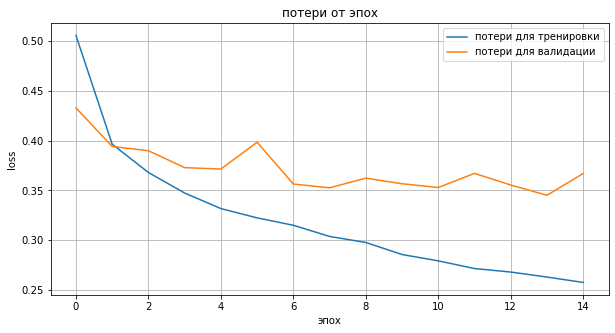

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(hh.history['loss'], label = 'потери для тренировки')
plt.plot(hh.history['val_loss'], label = 'потери для валидации')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('потери от эпох')
plt.show()

In [18]:
res = {}

### число нейронов двухслойной сети

In [19]:
def create_model(layers, neurons):
    model = Sequential()
    model.add(Dense(neurons, activation = 'relu', input_shape=(784,)))
    for k in range(layers - 2):
        model.add(Dense(neurons * (10-k) * 0.06, activation='relu', input_shape=(784,)))

    model.add(Dense(10, activation='softmax'))

    return model

In [20]:
for n_num in [16, 32, 64, 128, 256, 512]:
    model = create_model(2, n_num)
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'],)
    
    model.fit(train_images[:, :], y_tr[:, :], epochs = 15, batch_size = 32, validation_split = 0.2)
    res['2_' + str(n_num) + '_adam'] = [model.count_params(), model.evaluate(train_images, y_tr, batch_size=32)[1], model.evaluate(test_images, y_tt, batch_size=32)[1]]


Epoch 1/15
1500/1500 [==============================] - 1s 818us/step - loss: 0.7426 - accuracy: 0.7325 - val_loss: 0.4813 - val_accuracy: 0.8271
Epoch 2/15
1500/1500 [==============================] - 1s 741us/step - loss: 0.4453 - accuracy: 0.8422 - val_loss: 0.4335 - val_accuracy: 0.8468
Epoch 3/15
1500/1500 [==============================] - 1s 745us/step - loss: 0.4114 - accuracy: 0.8529 - val_loss: 0.4081 - val_accuracy: 0.8533
Epoch 4/15
1500/1500 [==============================] - 1s 762us/step - loss: 0.3988 - accuracy: 0.8567 - val_loss: 0.4057 - val_accuracy: 0.8537
Epoch 5/15
1500/1500 [==============================] - 1s 744us/step - loss: 0.3793 - accuracy: 0.8643 - val_loss: 0.3983 - val_accuracy: 0.8584
Epoch 6/15
1500/1500 [==============================] - 1s 743us/step - loss: 0.3671 - accuracy: 0.8679 - val_loss: 0.3939 - val_accuracy: 0.8570
Epoch 7/15
1500/1500 [==============================] - 1s 744us/step - loss: 0.3635 - accuracy: 0.8683 - val_loss: 0.3847 -

1500/1500 [==============================] - 1s 940us/step - loss: 0.2534 - accuracy: 0.9051 - val_loss: 0.3788 - val_accuracy: 0.8712
Epoch 9/15
1500/1500 [==============================] - 1s 914us/step - loss: 0.2558 - accuracy: 0.9026 - val_loss: 0.3582 - val_accuracy: 0.8778
Epoch 10/15
1500/1500 [==============================] - 1s 914us/step - loss: 0.2383 - accuracy: 0.9097 - val_loss: 0.3513 - val_accuracy: 0.8841
Epoch 11/15
1500/1500 [==============================] - 1s 920us/step - loss: 0.2258 - accuracy: 0.9165 - val_loss: 0.3431 - val_accuracy: 0.8817
Epoch 12/15
1500/1500 [==============================] - 1s 910us/step - loss: 0.2246 - accuracy: 0.9154 - val_loss: 0.3544 - val_accuracy: 0.8843
Epoch 13/15
1500/1500 [==============================] - 1s 917us/step - loss: 0.2170 - accuracy: 0.9186 - val_loss: 0.3636 - val_accuracy: 0.8792
Epoch 14/15
1500/1500 [==============================] - 1s 910us/step - loss: 0.2086 - accuracy: 0.9219 - val_loss: 0.3755 - val_a

In [21]:
pd.DataFrame.from_dict(res, orient='index', columns = ['params', 'acc_train', 'acc_test'])

,params,acc_train,acc_test
2_16_adam,12730,0.878750,0.8502
2_32_adam,25450,0.892917,0.8633
2_64_adam,50890,0.911617,0.8754
2_128_adam,101770,0.921717,0.8791
2_256_adam,203530,0.920300,0.8743
2_512_adam,407050,0.926300,0.8821


С увеличением количества нейронов точность на трейне и тесте растет, при этом кардинально растет количество тренируемых параметров. Однако, после 128 нейронов рост accuracy замедляется и увеличивается разрыв метрики между трейном и тестом

### количество слоев

In [22]:
for l in [2, 3, 5, 10]:
    model = create_model(l, 128)
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'],)
    
    model.fit(train_images[:, :], y_tr[:, :], epochs = 15, batch_size = 32, validation_split = 0.2)
    res[str(l) + '_128' + '_adam'] = [model.count_params(), model.evaluate(train_images, y_tr, batch_size=32)[1], model.evaluate(test_images, y_tt, batch_size=32)[1]]


Epoch 1/15
1500/1500 [==============================] - 2s 994us/step - loss: 0.6173 - accuracy: 0.7766 - val_loss: 0.4542 - val_accuracy: 0.8336
Epoch 2/15
1500/1500 [==============================] - 1s 912us/step - loss: 0.3957 - accuracy: 0.8545 - val_loss: 0.3945 - val_accuracy: 0.8554
Epoch 3/15
1500/1500 [==============================] - 1s 964us/step - loss: 0.3420 - accuracy: 0.8753 - val_loss: 0.3561 - val_accuracy: 0.8685
Epoch 4/15
1500/1500 [==============================] - 1s 927us/step - loss: 0.3281 - accuracy: 0.8791 - val_loss: 0.3582 - val_accuracy: 0.8699
Epoch 5/15
1500/1500 [==============================] - 1s 937us/step - loss: 0.3053 - accuracy: 0.8864 - val_loss: 0.3454 - val_accuracy: 0.8783
Epoch 6/15
1500/1500 [==============================] - 1s 938us/step - loss: 0.2847 - accuracy: 0.8949 - val_loss: 0.3466 - val_accuracy: 0.8767
Epoch 7/15
1500/1500 [==============================] - 1s 941us/step - loss: 0.2745 - accuracy: 0.8978 - val_loss: 0.3247 -

Epoch 9/15
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2863 - accuracy: 0.8956 - val_loss: 0.3624 - val_accuracy: 0.8752
Epoch 10/15
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2782 - accuracy: 0.8989 - val_loss: 0.3732 - val_accuracy: 0.8752
Epoch 11/15
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2684 - accuracy: 0.9025 - val_loss: 0.3717 - val_accuracy: 0.8701
Epoch 12/15
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2619 - accuracy: 0.9044 - val_loss: 0.3373 - val_accuracy: 0.8809
Epoch 13/15
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2554 - accuracy: 0.9080 - val_loss: 0.3498 - val_accuracy: 0.8751
Epoch 14/15
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2438 - accuracy: 0.9095 - val_loss: 0.3685 - val_accuracy: 0.8737
Epoch 15/15
313/313 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8713


In [23]:
pd.DataFrame.from_dict(res, orient='index', columns = ['params', 'train', 'test'])

,params,train,test
2_16_adam,12730,0.878750,0.8502
2_32_adam,25450,0.892917,0.8633
2_64_adam,50890,0.911617,0.8754
2_128_adam,101770,0.919800,0.8809
2_256_adam,203530,0.920300,0.8743
2_512_adam,407050,0.926300,0.8821
3_128_adam,111054,0.919600,0.8734
5_128_adam,120487,0.917017,0.8831
10_128_adam,129546,0.906100,0.8713


При зафиксированном количестве нейронов первого слоя увеличение глубины сети приводит к нестабильному поведению метрики на трейне, при добавлении пятого слоя мы чуть увеличили accuracy на тесте и снизили переобучение. При дальнейшем увеличении глубины падает качество как на трейне, так и на тесте, причем разрыв метрики увеличивается

### функции оптимизации

In [24]:
model = create_model(5, 128)
model.save_weights('model.h5')

In [25]:
plt.figure(figsize=(20, 10))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

<Figure size 1440x720 with 0 Axes>

313/313 [==============================] - 0s 951us/step - loss: 0.3685 - accuracy: 0.8790


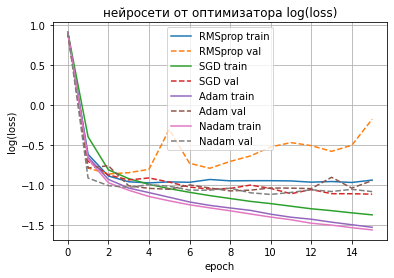

In [26]:
# будем изменять оптимизаторы
for i_optim in [RMSprop(), SGD(), Adam(), Nadam()]:
    # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = create_model(5, 128)
    
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model.h5')
    
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(optimizer=i_optim, loss='categorical_crossentropy', metrics=['accuracy'],)
    
    # вычисляем ошибку для modeli без обучения  
    # (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, 
    # но будем контролировать это и считаем каждый раз заново)
    hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
    
    # проводим обучение модели 
    hh = modeli.fit(train_images, to_categorical(train_labels), epochs=epochs, batch_size=32, validation_split=0.2, verbose = 0)
    
    res['5' + '_128_' + str(modeli.optimizer.get_config()['name'])] = [modeli.count_params(), modeli.evaluate(train_images, y_tr, batch_size=32)[1], modeli.evaluate(test_images, y_tt, batch_size=32)[1]]

    # картинки
    plt.plot(epoch, np.log([hh0_tr[0]] + hh.history['loss']), '-', label = modeli.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, np.log([hh0_val[0]] + hh.history['val_loss']), '--', label = modeli.optimizer.get_config()['name'] + ' val')

plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


In [27]:
pd.DataFrame.from_dict(res, orient='index', columns = ['params', 'train', 'test'])

,params,train,test
2_16_adam,12730,0.878750,0.8502
2_32_adam,25450,0.892917,0.8633
2_64_adam,50890,0.911617,0.8754
2_128_adam,101770,0.919800,0.8809
2_256_adam,203530,0.920300,0.8743
2_512_adam,407050,0.926300,0.8821
3_128_adam,111054,0.919600,0.8734
5_128_adam,120487,0.917017,0.8831
10_128_adam,129546,0.906100,0.8713
5_128_RMSprop,120487,0.877483,0.8543


Лучшие результаты получены алгоритмами Adaptive Moment Estimation и Nesterov-accelerated Adaptive Moment Estimation - при пересоздании модели в зависимости от начальных весов к максимальному результату приводит либо первый, либо второй

### multilabel_confusion_matrix

In [28]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score

In [29]:
def evaluate_results(y_test, y_predict):
    f1 = f1_score(y_test, y_predict)
    rec = recall_score(y_test, y_predict, average='binary')
    prc = precision_score(y_test, y_predict, average='binary')

    return f1, prc, rec

Для построения матрицы ошибок возьмем последнюю обученную модель

In [30]:
modeli.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_58 (Dense)             (None, 76)                9804      
_________________________________________________________________
dense_59 (Dense)             (None, 69)                5313      
_________________________________________________________________
dense_60 (Dense)             (None, 61)                4270      
_________________________________________________________________
dense_61 (Dense)             (None, 10)                620       
Total params: 120,487
Trainable params: 120,487
Non-trainable params: 0
_________________________________________________________________


In [31]:
y_pred = modeli.predict(test_images)
y_pred_class = np.argmax(y_pred, axis = 1)

In [32]:
multilabel_confusion_matrix(test_labels, y_pred_class)

array([[[8830,  170],
        [ 182,  818]],

       [[8995,    5],
        [  33,  967]],

       [[8800,  200],
        [ 204,  796]],

       [[8846,  154],
        [  92,  908]],

       [[8779,  221],
        [ 165,  835]],

       [[8972,   28],
        [  76,  924]],

       [[8757,  243],
        [ 326,  674]],

       [[8940,   60],
        [  72,  928]],

       [[8951,   49],
        [  27,  973]],

       [[8920,   80],
        [  33,  967]]], dtype=int64)

In [33]:
scores = score(test_labels, y_pred_class)[:-1]
scores

(array([0.82793522, 0.99485597, 0.79919679, 0.85499058, 0.7907197 ,
        0.97058824, 0.73500545, 0.93927126, 0.95205479, 0.92359121]),
 array([0.818, 0.967, 0.796, 0.908, 0.835, 0.924, 0.674, 0.928, 0.973,
        0.967]),
 array([0.82293763, 0.98073022, 0.79759519, 0.88069835, 0.81225681,
        0.94672131, 0.70318206, 0.93360161, 0.96241345, 0.94479726]))

In [34]:
pd.DataFrame(scores, index = ['precision', 'recall', 'fscore'],)

,0,1,2,3,4,5,6,7,8,9
precision,0.827935,0.994856,0.799197,0.854991,0.790720,0.970588,0.735005,0.939271,0.952055,0.923591
recall,0.818000,0.967000,0.796000,0.908000,0.835000,0.924000,0.674000,0.928000,0.973000,0.967000
fscore,0.822938,0.980730,0.797595,0.880698,0.812257,0.946721,0.703182,0.933602,0.962413,0.944797


Хуже всех распознаются классы 0, 2 и 6

In [35]:
test_labels[:20]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0],
      dtype=uint8)

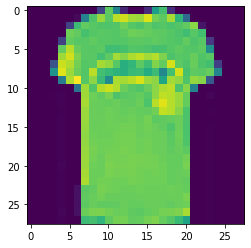

In [36]:
# class 0
plt.imshow(test_imagesi[19,:,:])
plt.show()

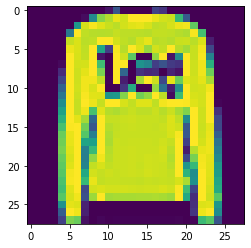

In [37]:
# class 2
plt.imshow(test_imagesi[1,:,:])
plt.show()

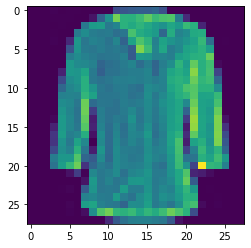

In [38]:
# class 6
plt.imshow(test_imagesi[4,:,:])
plt.show()

Они слишком похожи между собой